In [1]:
%matplotlib inline

import pandas as pd
import time
import warnings
import os

from strategy.idtStrategy import IDTStrategy
from optimizer import Optimizer
from analyzer import Analyzer

if __name__ == "__main__":

    warnings.filterwarnings('ignore')
    
    tic = time.time()
    symbol = 'NIFTY'
    startYr = None
    endYr = None
    initCap = 100000
    strat = IDTStrategy(symbol, initCap, startYr=startYr, endYr=endYr)
    
    #combosGen = strat.combosGenerator()
    #combos= []
    #for combo in combosGen:
    #    if combo[5] == combo[6]:
    #        combos.append(combo)
    #print(len(combos)) 
    #opt = Optimizer(strat, combos)
    #opt.run()
    
    #res = opt.getResults()
    #best = opt.getBestComboSharpe()
    #path = 'summary'+os.sep+symbol+os.sep+str(best[0])
    #if not os.path.exists(path):
    #    os.makedirs(path)
    #s = pd.Series()
    #s.loc['Best Combo'] = best
     
    #s.to_csv(path+os.sep+'BestCombo.csv')
    #res.to_csv(path+os.sep+'AllCombinations.csv')
    
    #best = (15, 7, 12, 25, 50, 20, 20, 0.2, 0.1, 0.15, 0.3, 0.2, -0.15)
    best = (15, 7, 12, 25, 50, 20, 20, 0.4, 0.3, 0.15, 0.4, 0.3, -0.15)
    returns, buyAndHoldReturns, transactions = strat.run(best, True)
    
    #print('Combinations Tested:', len(combos))
    print('Time Taken:', (time.time() - tic)/60)
    print('Best Combination:', best)

Combo (15, 7, 12, 25, 50, 20, 20, 0.4, 0.3, 0.15, 0.4, 0.3, -0.15)
Time Taken: 0.2235246181488037
Best Combination: (15, 7, 12, 25, 50, 20, 20, 0.4, 0.3, 0.15, 0.4, 0.3, -0.15)


Entire data start date: 2013-07-03
Entire data end date: 2018-10-12
Backtest Months: 61



Performance Statistics   Backtest
annual_return (%)       28.793988
annual_volatility (%)   14.400981
sharpe_ratio             1.757157
calmar_ratio             2.429289
max_drawdown (%)       -11.852846
omega_ratio              1.133475
sortino_ratio            1.440101
skew                     3.234203
kurtosis                84.742150
tail_ratio               1.100381
alpha                    0.253408
beta                    -0.003233

Worst Drawdown Periods net drawdown in %  peak date valley date recovery date  \
0                                  11.85 2013-09-25  2013-11-18    2013-12-09   
1                                   8.52 2014-05-16  2014-08-01    2014-12-02   
2                                   8.25 2015-04-20  2015-06-02    2015-08-28   
3                                   6.81 2016-07-14  2016-08-29    2016-11-15   
4                                   6.71 2015-11-05  2015-12-03    2015-12-23   

Worst Drawdown Periods duration  
0                            53  
1                           143  
2                            94  
3                            88  
4                            35

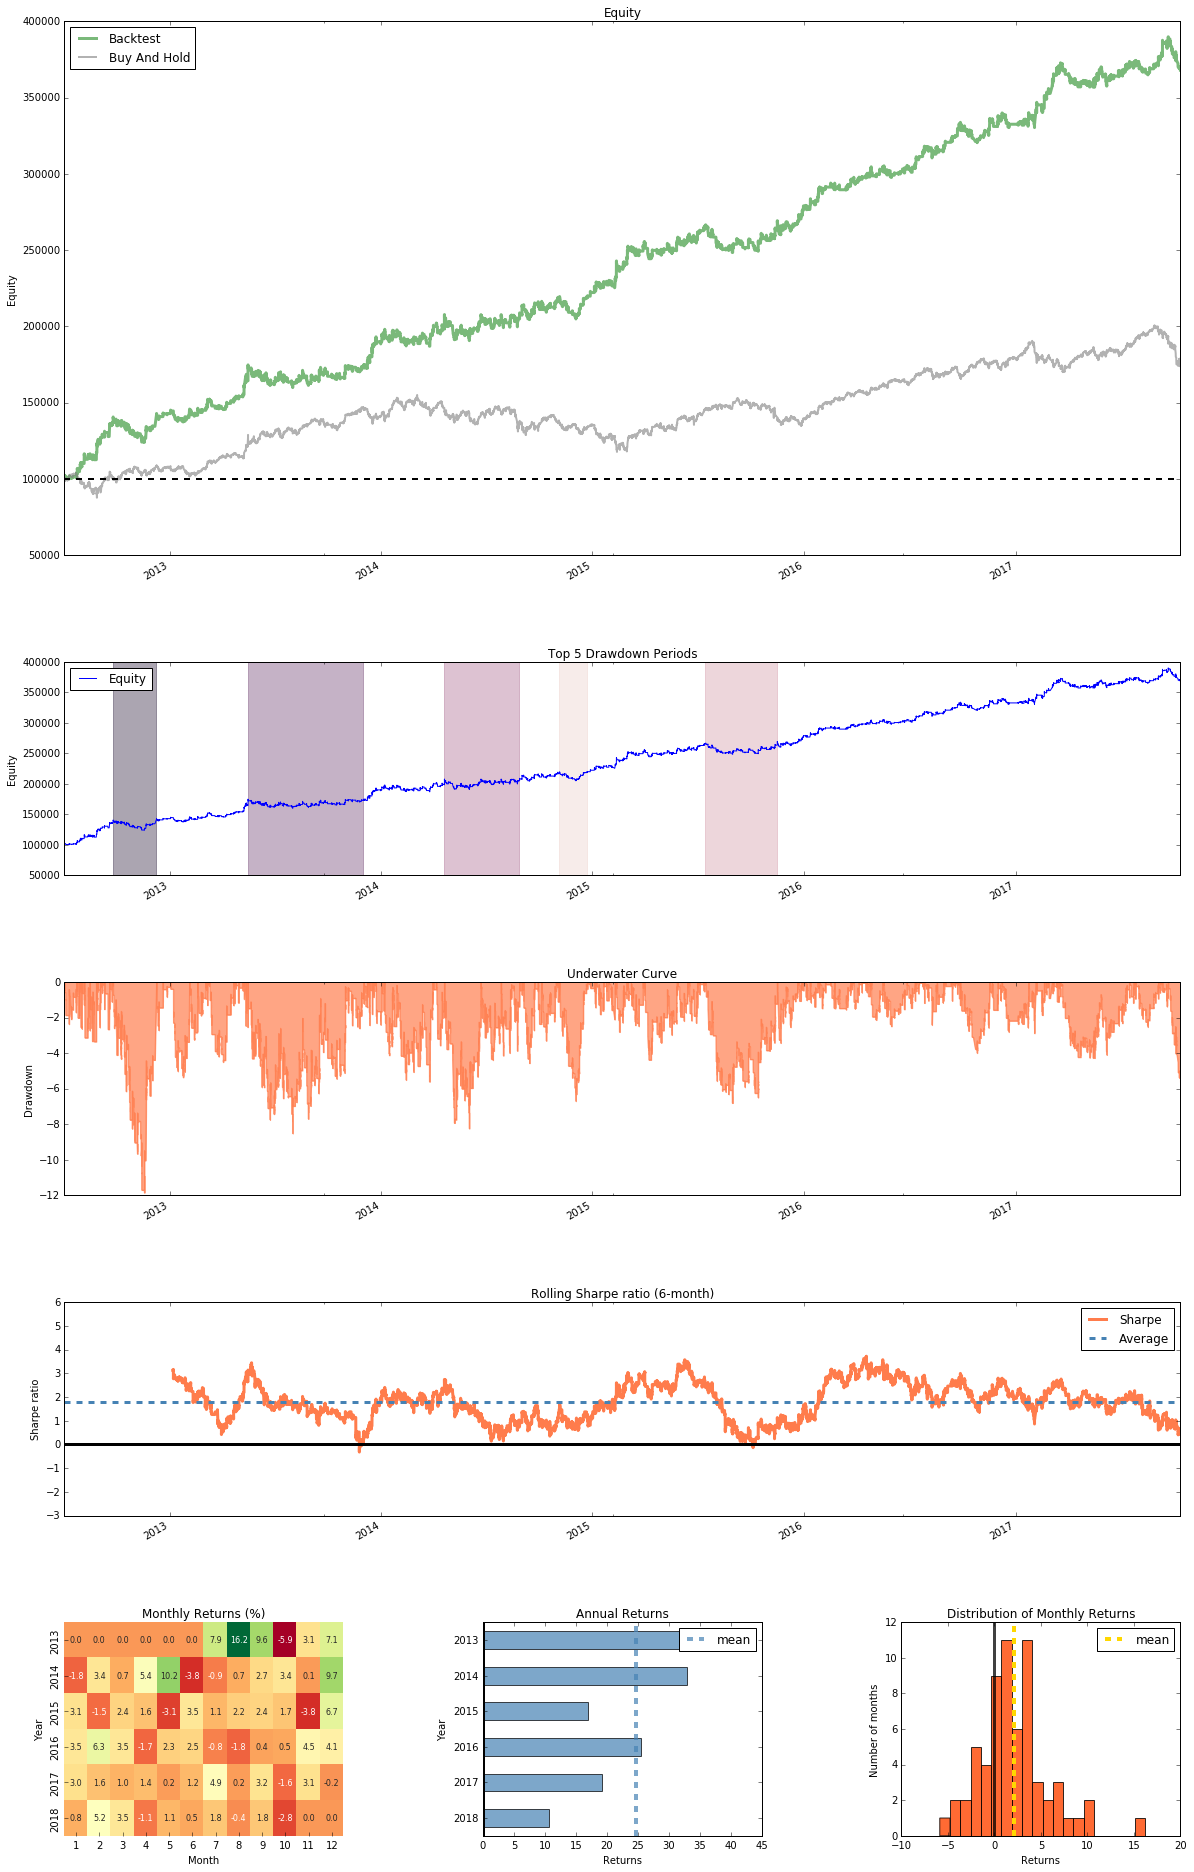

In [2]:
a = Analyzer(initCap)
a.createReturnsTearSheet(returns=returns, buyAndHoldReturns=buyAndHoldReturns)

Summary Stats                All Trades  Short Trades  Long Trades
Total Number of Round Trips      935.00        428.00       507.00
Hit Ratio (%)                     57.11         53.97        59.76
Winning Round Trips              534.00        231.00       303.00
Losing Round Trips               401.00        197.00       204.00
Even Round Trips                   0.00          0.00         0.00

PnL Stats                                 All Trades  Short Trades  \
Total Profit (in Rs.)                      267978.75     129303.75   
Gross Profit (in Rs.)                     1064868.75     517710.00   
Gross Loss (in Rs.)                       -609890.00    -302806.25   
Profit Factor                                   1.75          1.71   
Average Nett. Profit (in Rs.)                 286.61        302.11   
Average Profit (Winning Trades) (in Rs.)     1794.14       2041.17   
Average Loss (Losing Trades) (in Rs.)       -1720.92      -1737.09   
Average Profit:Average Loss                     1.04          1.18   
Largest Winning Trade (in Rs.)               7837.50       7136.25   
Largest Losing Trade (in Rs.)               -2568.75      -2557.50   

PnL Stats                                 Long Trades  
Total Profit (in Rs.)                       138675.00  
Gross Profit (in Rs.)                       547158.75  
Gross Loss (in Rs.)                        -307083.75  
Profit Factor                                    1.78  
Average Nett. Profit (in Rs.)                  273.52  
Average Profit (Winning Trades) (in Rs.)      1605.80  
Average Loss (Losing Trades) (in Rs.)        -1705.31  
Average Profit:Average Loss                      0.94  
Largest Winning Trade (in Rs.)                7837.50  
Largest Losing Trade (in Rs.)                -2568.75

Duration Stats        All Trades    Short Trades     Long Trades
Average Duration 02:10:47.807486 01:44:43.177570 02:32:48.639053
Median Duration         01:30:00        01:15:00        02:00:00

Return Stats (in %)               All Trades  Short Trades  Long Trades
Average Returns                         0.14          0.16         0.12
Average Returns (Winning Trades)        0.84          0.96         0.74
Average Returns (Losing Trades)        -0.79         -0.78        -0.79
Median Returns                          0.20          0.18         0.22
Median Returns (Winning Trades)         0.70          0.84         0.57
Median Returns (Losing Trades)         -0.78         -0.76        -0.84
Largest Winning Trade Return            4.67          4.54         4.67
Largest Losing Trade Return            -1.35         -1.26        -1.35

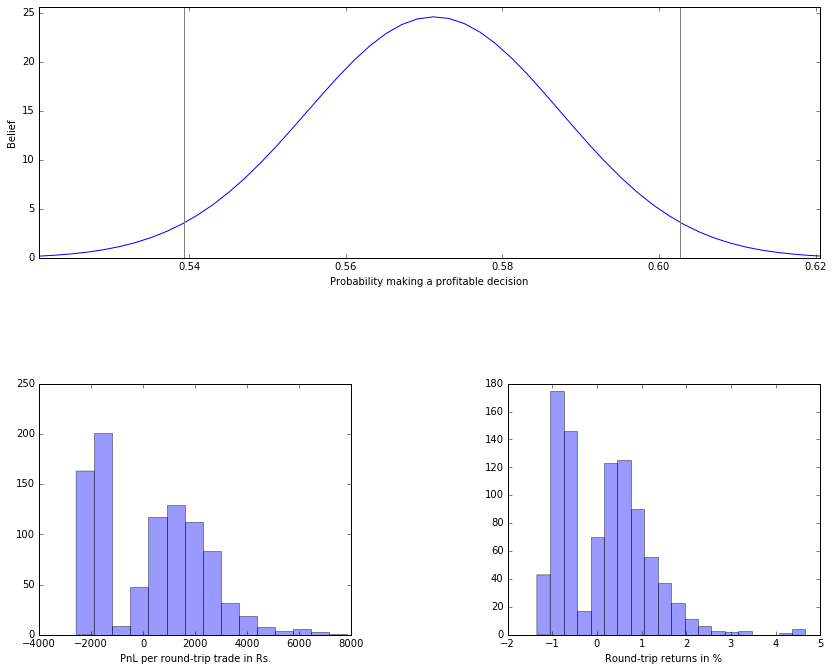

In [3]:
a.createRoundTripTearSheet(transactions)